# Company Bankruptcy Prediction
Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009 

## Goal 
how many firms are bankrupt, and how many are not.

# Attribute Information
Updated column names and description to make the data easier to understand (Y = Output feature, X = Input features)

<details>
Y - Bankrupt?: Class label
    
X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
    
X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)
    
X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
    
X4 - Operating Gross Margin: Gross Profit/Net Sales
    
X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales
    
X6 - Operating Profit Rate: Operating Income/Net Sales
    
X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
    
X8 - After-tax net Interest Rate: Net Income/Net Sales
    
X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
    
X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
    
X11 - Operating Expense Rate: Operating Expenses/Net Sales
    
X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales
    
X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities
    
X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity 
    
X15 - Tax rate (A): Effective Tax Rate
    
X16 - Net Value Per Share (B): Book Value Per Share(B) 
    
X17 - Net Value Per Share (A): Book Value Per Share(A)
    
X18 - Net Value Per Share (C): Book Value Per Share(C)
    
X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income
    
X20 - Cash Flow Per Share
    
X21 - Revenue Per Share (Yuan ¥): Sales Per Share
    
X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share
    
X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
    
X24 - Realized Sales Gross Profit Growth Rate
    
X25 - Operating Profit Growth Rate: Operating Income Growth
    
X26 - After-tax Net Profit Growth Rate: Net Income Growth
    
X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
    
X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
    
X29 - Total Asset Growth Rate: Total Asset Growth
    
X30 - Net Value Growth Rate: Total Equity Growth
    
X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
    
X32 - Cash Reinvestment %: Cash Reinvestment Ratio
    
X33 - Current Ratio
    
X34 - Quick Ratio: Acid Test
    
X35 - Interest Expense Ratio: Interest Expenses/Total Revenue
    
X36 - Total debt/Total net worth: Total Liability/Equity Ratio
    
X37 - Debt ratio %: Liability/Total Assets
    
X38 - Net worth/Assets: Equity/Total Assets
    
X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
    
X40 - Borrowing dependency: Cost of Interest-bearing Debt
    
X41 - Contingent liabilities/Net worth: Contingent Liability/Equity
    
X42 - Operating profit/Paid-in capital: Operating Income/Capital
    
X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital
    
X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
    
    X45 - Total Asset Turnover
    X46 - Accounts Receivable Turnover
    X47 - Average Collection Days: Days Receivable Outstanding
    X48 - Inventory Turnover Rate (times)
    X49 - Fixed Assets Turnover Frequency
    X50 - Net Worth Turnover Rate (times): Equity Turnover
    X51 - Revenue per person: Sales Per Employee
    X52 - Operating profit per person: Operation Income Per Employee
    X53 - Allocation rate per person: Fixed Assets Per Employee
    X54 - Working Capital to Total Assets
    X55 - Quick Assets/Total Assets
    X56 - Current Assets/Total Assets
    X57 - Cash/Total Assets
    X58 - Quick Assets/Current Liability
    X59 - Cash/Current Liability
    X60 - Current Liability to Assets
    X61 - Operating Funds to Liability
    X62 - Inventory/Working Capital
    X63 - Inventory/Current Liability
    X64 - Current Liabilities/Liability
    X65 - Working Capital/Equity
    X66 - Current Liabilities/Equity
    X67 - Long-term Liability to Current Assets
    X68 - Retained Earnings to Total Assets
    X69 - Total income/Total expense
    X70 - Total expense/Assets
    X71 - Current Asset Turnover Rate: Current Assets to Sales
    X72 - Quick Asset Turnover Rate: Quick Assets to Sales
    X73 - Working capitcal Turnover Rate: Working Capital to Sales
    X74 - Cash Turnover Rate: Cash to Sales
    X75 - Cash Flow to Sales
    X76 - Fixed Assets to Assets
    X77 - Current Liability to Liability
    X78 - Current Liability to Equity
    X79 - Equity to Long-term Liability
    X80 - Cash Flow to Total Assets
    X81 - Cash Flow to Liability
    X82 - CFO to Assets
    X83 - Cash Flow to Equity
    X84 - Current Liability to Current Assets
    X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
    X86 - Net Income to Total Assets
    X87 - Total assets to GNP price
    X88 - No-credit Interval
    X89 - Gross Profit to Sales
    X90 - Net Income to Stockholder's Equity
    X91 - Liability to Equity
    X92 - Degree of Financial Leverage (DFL)
    X93 - Interest Coverage Ratio (Interest expense to EBIT)
    X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
    X95 - Equity to Liability
    
</details>

In [89]:
# Import libraries here
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [3]:
df=pd.read_csv('data/data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# Explore 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

That's solid information. We know all our features are numerical and that we have no missing data. But,it's a good idea to do some visualizations to see if there are any interesting trends or ideas we should keep in mind while we work. First, let's take a look at how many firms are bankrupt, and how many are not.

<AxesSubplot:>

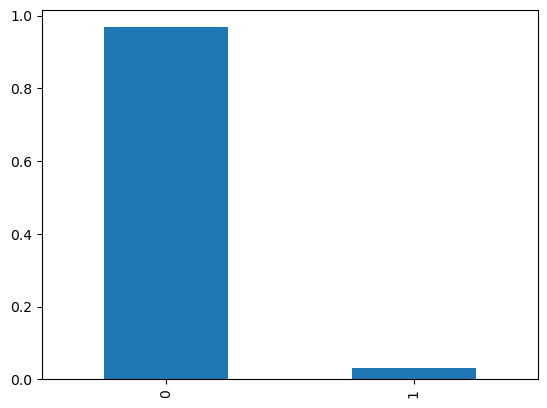

In [5]:
df['Bankrupt?'].value_counts(normalize=True).plot(kind='bar')

That's good news for Japan's economy! Since it looks like most of the companies in our dataset are doing all right for themselves, let's drill down a little farther. However, it also shows us that we have an **imbalanced** dataset, where our majority class is far bigger than our minority class.

 there were 64 features of each company, each of which had some kind of numerical value. It might be useful to understand where the values for one of these features cluster, so let's make a boxplot to see how the values in `"Interest Expense Ratio"` are distributed.

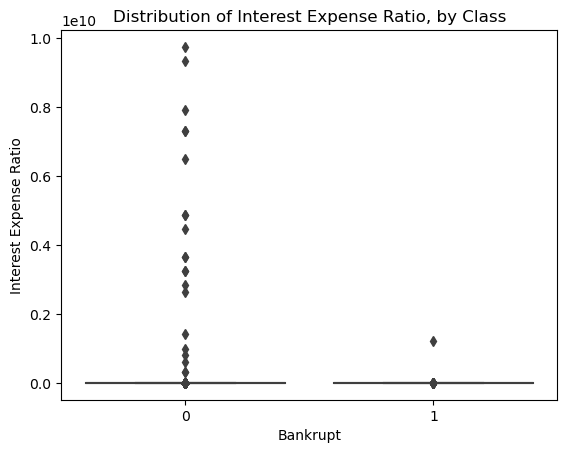

In [6]:
# Create boxplot
sns.boxplot(y=' Accounts Receivable Turnover',x='Bankrupt?',data=df)
plt.xlabel("Bankrupt")
plt.ylabel("Interest Expense Ratio")
plt.title("Distribution of Interest Expense Ratio, by Class");

Why does this look so funny? Remember that boxplots exist to help us see the quartiles in a dataset, and this one doesn't really do that. Let's check the distribution of `"Interest Expense Ratio"`to see if we can figure out what's going on here.

In [7]:
# Summary statistics for ` Operating Profit Rate`
df[' Operating Profit Rate'].describe().apply('{0:,.0f}'.format)

count    6,819
mean         1
std          0
min          0
25%          1
50%          1
75%          1
max          1
Name:  Operating Profit Rate, dtype: object

<AxesSubplot:>

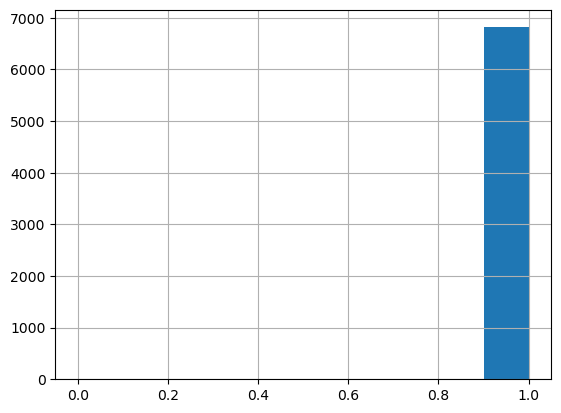

In [8]:
df[' Operating Profit Rate'].hist()

Aha! We saw it in the numbers and now we see it in the histogram. The data is very skewed. So, in order to create a helpful boxplot, we need to trim the data.

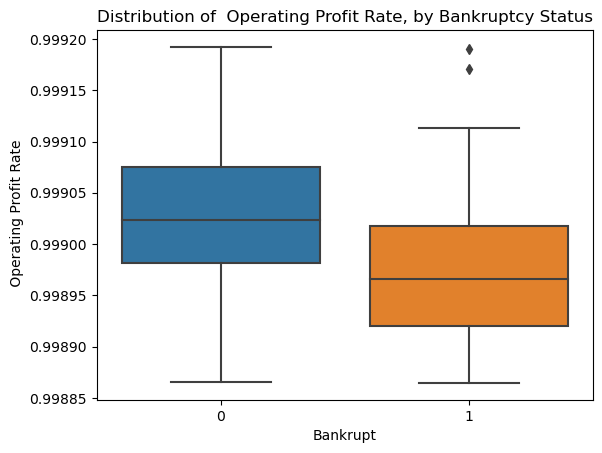

In [9]:
# Create clipped boxplot
q1,q9=df[' Operating Profit Rate'].quantile([0.1,0.9])
mask=df[' Operating Profit Rate'].between(q1,q9)
sns.boxplot(x='Bankrupt?',y=' Operating Profit Rate',data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel(" Operating Profit Rate")
plt.title("Distribution of  Operating Profit Rate, by Bankruptcy Status");

That makes a lot more sense. Let's take a look at some of the other features in the dataset to see what else is out there.

In [10]:
df[' Total income/Total expense'].describe().apply('{0:,.0f}'.format)

count    6,819
mean         0
std          0
min          0
25%          0
50%          0
75%          0
max          1
Name:  Total income/Total expense, dtype: object

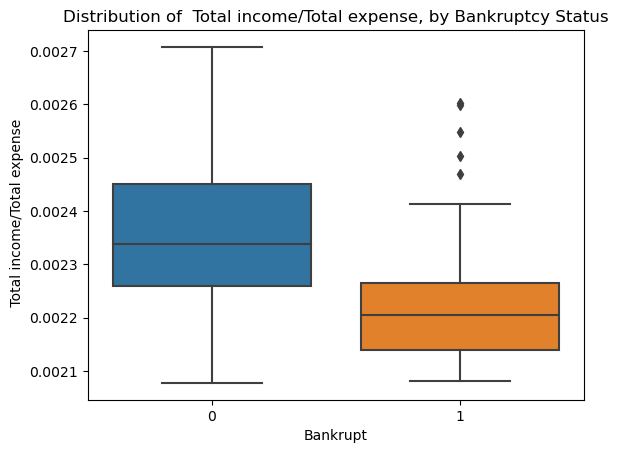

In [11]:
q1,q9=df[' Total income/Total expense'].quantile([0.1,0.9])
mask=df[' Total income/Total expense'].between(q1,q9)
sns.boxplot(x='Bankrupt?',y=' Total income/Total expense',data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel(" Total income/Total expense")
plt.title("Distribution of  Total income/Total expense, by Bankruptcy Status");

In [12]:
df[' ROA(C) before interest and depreciation before interest'].describe().apply('{0:,.0f}'.format)

count    6,819
mean         1
std          0
min          0
25%          0
50%          1
75%          1
max          1
Name:  ROA(C) before interest and depreciation before interest, dtype: object

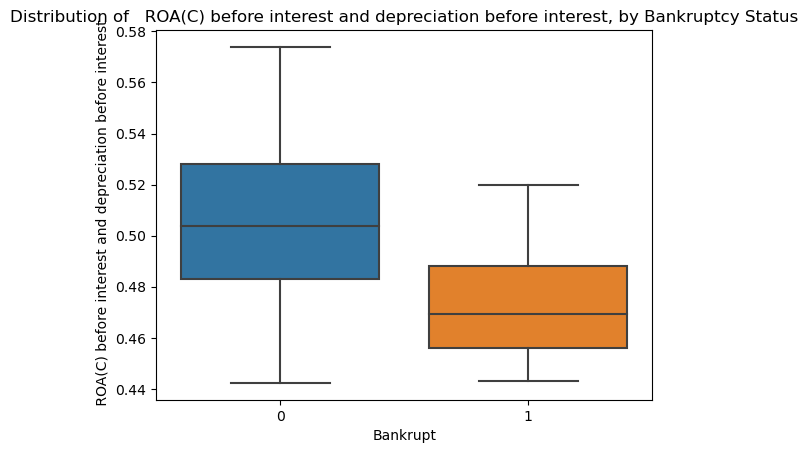

In [13]:
q1,q9=df[' ROA(C) before interest and depreciation before interest'].quantile([0.1,0.9])
mask=df[' ROA(C) before interest and depreciation before interest'].between(q1,q9)
sns.boxplot(x='Bankrupt?',y=' ROA(C) before interest and depreciation before interest',data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel(" ROA(C) before interest and depreciation before interest")
plt.title("Distribution of   ROA(C) before interest and depreciation before interest, by Bankruptcy Status");

Looking at other features, we can see that they're skewed, too. This will be important to keep in mind when we decide what type of model we want to use.

Another important consideration for model selection is whether there are any issues with multicollinearity in our model. Let's check.

<AxesSubplot:>

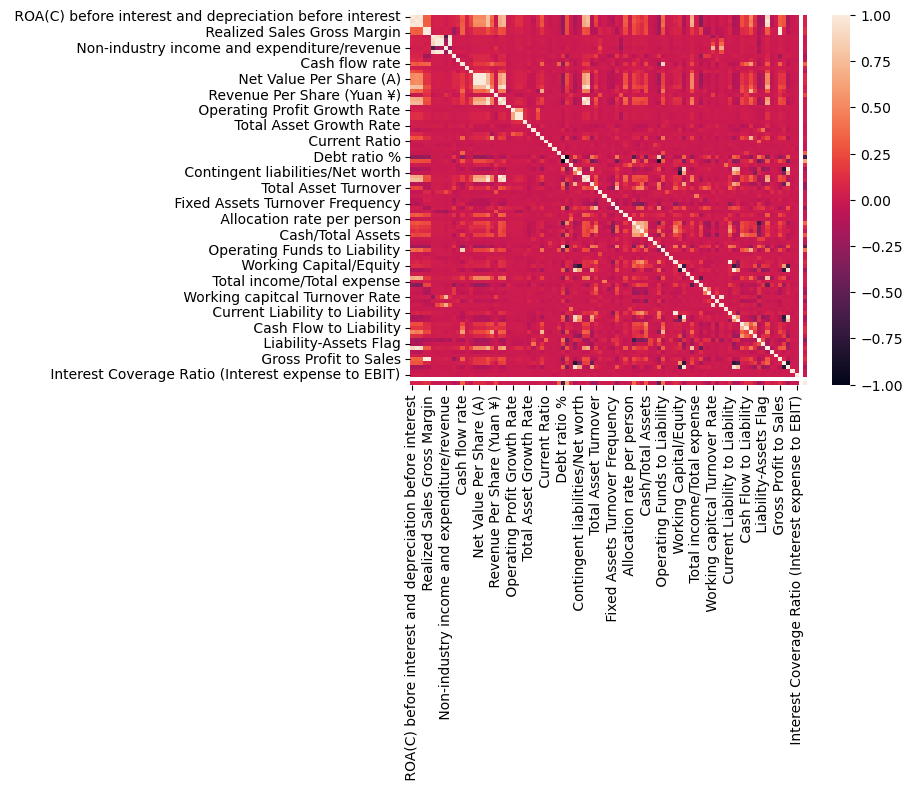

In [14]:
corr=df.drop(columns='Bankrupt?').corr()
sns.heatmap(corr)

So what did we learn from this EDA? First, our data is imbalanced. This is something we need to address in our data preparation. Second,our features haven't missing but if there are values that we'll need to impute. And since the features are highly skewed, the best imputation strategy is likely median, not mean. Finally, we have autocorrelation issues, which means that we should steer clear of linear models, and try a tree-based model instead.

# Split

In [15]:
target = "Bankrupt?"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


# Resample

Now that we've split our data into training and validation sets, we can address the class imbalance we saw during our EDA. One strategy is to resample the training data. There are many to do this, so let's start with under-sampling.

In [17]:
under_sampler =RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(338, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
5782,0.547409,0.597580,0.583757,0.604707,0.604707,0.999089,0.797593,0.809456,0.303629,0.781726,...,0.831586,0.001479,0.624287,0.604706,0.842928,0.279743,0.026801,0.565205,1,0.029354
5200,0.575196,0.622928,0.609187,0.606142,0.606142,0.999085,0.797859,0.809654,0.304102,0.781934,...,0.845096,0.001891,0.624553,0.606139,0.843117,0.277089,0.026791,0.565159,1,0.050445
3786,0.490567,0.552933,0.539483,0.629665,0.629520,0.999108,0.797607,0.809484,0.303613,0.781755,...,0.810341,0.001115,0.624214,0.629664,0.840741,0.275084,0.026791,0.565158,1,0.250781
1338,0.543899,0.598779,0.593180,0.602740,0.602754,0.999041,0.797495,0.809399,0.303559,0.781664,...,0.828565,0.001621,0.623379,0.602735,0.843240,0.282201,0.026865,0.565489,1,0.023104
4804,0.608980,0.658689,0.655174,0.612491,0.613183,0.999193,0.798374,0.810111,0.304774,0.782440,...,0.867959,0.010567,0.621156,0.612491,0.843773,0.275537,0.026791,0.565158,1,0.123342


And then we'll over-sample.

In [18]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(10572, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


# Build Model

## base line

In [19]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.969


Note here that, because our classes are imbalanced, the baseline accuracy is very high. We should keep this in mind because, even if our trained model gets a high validation accuracy score, that doesn't mean it's actually *good.* 

## Iterate

## 1- Decision Tree model

In [20]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(SimpleImputer(strategy='median'),DecisionTreeClassifier(random_state=42))
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(SimpleImputer(strategy='median'),DecisionTreeClassifier(random_state=42))
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(SimpleImputer(strategy='median'),DecisionTreeClassifier(random_state=42))
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

## Evaluate 

In [21]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9531
Training Accuracy: 0.813
Test Accuracy: 0.8057
Training Accuracy: 1.0
Test Accuracy: 0.9604


"good" accuracy scores don't tell us much about the model's performance when dealing with imbalanced data. So instead of looking at what the model got right or wrong

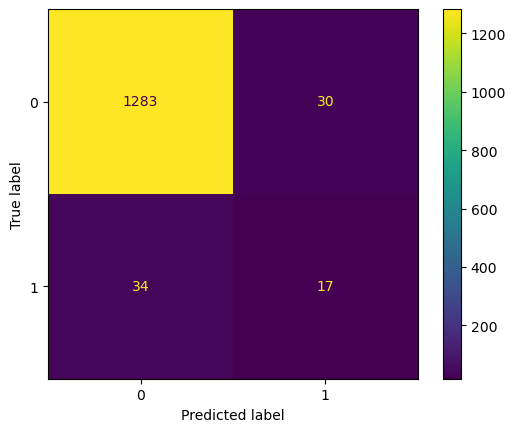

In [22]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg,X_test,y_test)

In [23]:
#Determine the depth of the decision tree in model_over
depth = model_over.named_steps['decisiontreeclassifier'].get_depth()
print(depth)

53


##  Communicate
Now that we have a reasonable model, let's graph the importance of each feature.

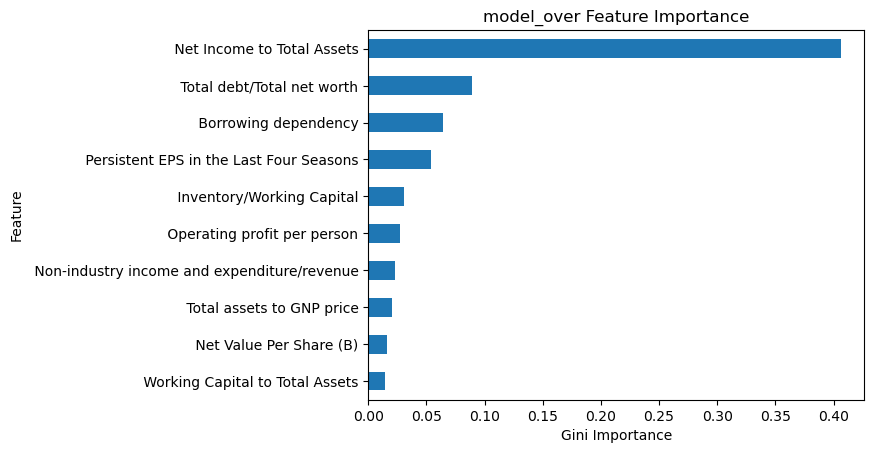

In [24]:
# Get importances
importances = model_over.named_steps['decisiontreeclassifier'].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances,index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

confusion matrix does not give us the best result so we need another model to get more ***TP ,TN*** results


## 2- Random Forest Classifier

In [26]:
clf = make_pipeline(SimpleImputer(),RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [27]:
cv_acc_scores = cross_val_score(clf,X_train_over,y_train_over,cv=5,n_jobs=-1)
print(cv_acc_scores)

[0.99338061 0.99432624 0.99432356 0.99668874 0.99432356]


In [28]:
params ={'simpleimputer__strategy':['mean','median'],
        'randomforestclassifier__max_depth':range(10,50,10),
        'randomforestclassifier__n_estimators':range(25,100,25)}

In [29]:
model = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [32]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.287459,0.049826,0.034180,0.003967,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979196,0.977778,0.980132,0.978713,0.979659,0.979096,0.000811,21
1,1.458360,0.024056,0.035780,0.005841,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979196,0.977778,0.980132,0.978713,0.979659,0.979096,0.000811,21
2,2.503959,0.076076,0.069960,0.025022,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979669,0.979196,0.980132,0.979186,0.979186,0.979474,0.000378,19
3,3.033654,0.096780,0.054369,0.011032,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979669,0.979196,0.980132,0.979186,0.979186,0.979474,0.000378,19
4,3.993904,0.078464,0.079954,0.013805,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979196,0.980142,0.977294,0.979659,0.978713,0.979001,0.000977,23


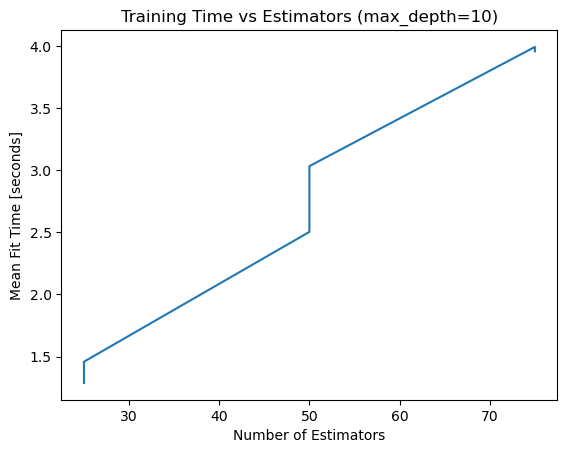

In [36]:
# Create mask
mask = cv_results['param_randomforestclassifier__max_depth']==10
# Plot fit time vs n_estimators
plt.plot(cv_results[mask]['param_randomforestclassifier__n_estimators'],cv_results[mask]['mean_fit_time'])
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

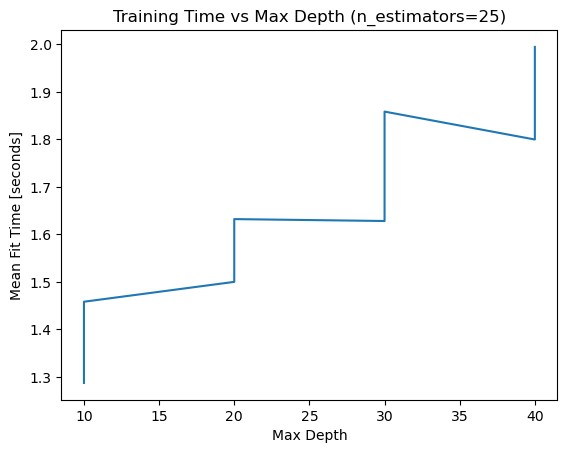

In [38]:
# Create mask
mask = cv_results['param_randomforestclassifier__n_estimators']==25
# Plot fit time vs max_depth
plt.plot(cv_results[mask]['param_randomforestclassifier__max_depth'],cv_results[mask]['mean_fit_time'])
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

There's a general upwards trend, but we see a lot of up-and-down here. That's because for each max depth, grid search tries two different imputation strategies: mean and median. Median is a lot faster to calculate, so that speeds up training time.

Finally, let's look at the hyperparameters that led to the best performance.

In [39]:
# Extract best hyperparameters
model.best_params_

{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'mean'}

## Evaluate

In [40]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9663


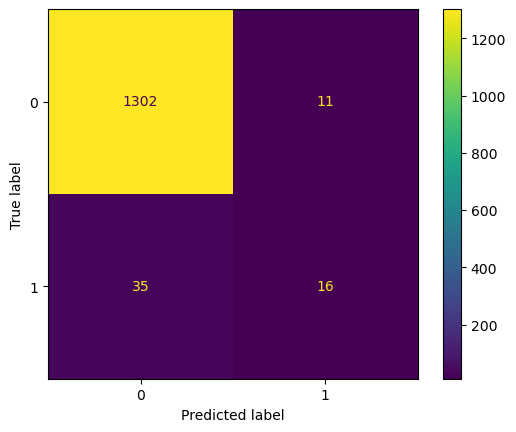

In [41]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

## Communicate

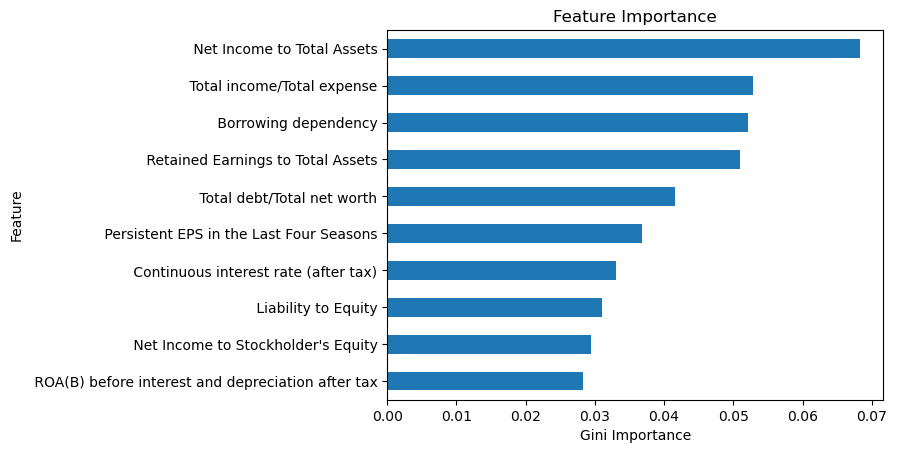

In [43]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [45]:
# save the model
import pickle
with open( "Random_Forest_model.pkl",'wb') as f :
    pickle.dump(model,f)

In [65]:
X_test.to_csv("data/X_test.csv",index=False)

In [66]:
def make_predictions(data_filepath, model_filepath):
    # Wrangle JSON file
    X_test = pd.read_csv(data_filepath)
    # Load model
    with open(model_filepath,'rb') as file:
        model=pickle.load(file)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series with name "bankrupt", and same index as X_test
    y_test_pred = pd.Series(y_test_pred,index=X_test.index,name='bankrupt')
    return y_test_pred

In [67]:
y_test_pred = make_predictions(
    data_filepath="data/X_test.csv",
    model_filepath="Random_Forest_model.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (1364,)


0    0
1    0
2    0
3    1
4    0
Name: bankrupt, dtype: int64

## 3- Gradient Boosting Classifier

In [71]:
clf = make_pipeline(SimpleImputer(),GradientBoostingClassifier())
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])


In [72]:
params = {'simpleimputer__strategy':['mean','median']
         ,'gradientboostingclassifier__max_depth':range(2,5)
         ,'gradientboostingclassifier__n_estimators':range(20,31,5)}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__max_depth': range(2, 5),
 'gradientboostingclassifier__n_estimators': range(20, 31, 5)}

Note that we're trying much smaller numbers of n_estimators. This is because GradientBoostingClassifier is slower to train than the RandomForestClassifier. You can try increasing the number of estimators to see if model performance improves, but keep in mind that you could be waiting a long time!

In [73]:
model = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [74]:
# Fit model to over-sampled training data
model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [75]:
results = pd.DataFrame(model.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,10.763213,0.056432,0.019989,0.005997,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.963121,0.964066,0.964522,0.966887,0.971618,0.966043,0.003051,1
17,11.110814,0.148439,0.015791,0.002039,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.962648,0.964066,0.964522,0.966414,0.972091,0.965948,0.003299,2
15,9.220324,0.104813,0.016591,0.002243,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.961229,0.962175,0.962157,0.964995,0.970199,0.964151,0.003277,3
14,9.269073,0.249547,0.015791,0.000399,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.961229,0.962175,0.962157,0.964995,0.969726,0.964056,0.003104,4
13,8.057969,0.085673,0.020789,0.007164,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.957447,0.960284,0.957900,0.960738,0.966887,0.960651,0.003373,5
12,8.097546,0.107288,0.016591,0.002330,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.957447,0.960284,0.957900,0.960738,0.966887,0.960651,0.003373,5
10,9.478034,0.150210,0.018589,0.002153,3,30,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.945154,0.948936,0.950804,0.947020,0.945601,0.947503,0.002113,7
11,9.734389,0.149561,0.017191,0.001165,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.945154,0.948936,0.950804,0.946547,0.945601,0.947408,0.002143,8
9,8.219004,0.069603,0.016591,0.001019,3,25,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.939007,0.942317,0.932829,0.942763,0.942763,0.939936,0.003822,9
8,8.365986,0.155735,0.021588,0.008208,3,25,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.939007,0.942317,0.932829,0.942763,0.942763,0.939936,0.003822,9


In [76]:
# Extract best hyperparameters
model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'mean'}

## Evaluate

In [77]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9487
Validation Accuracy: 0.9267


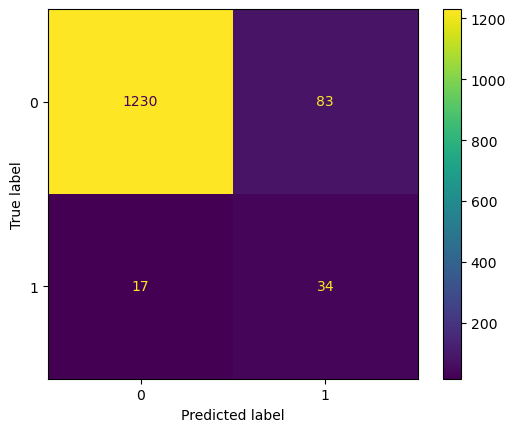

In [78]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

This matrix is a great reminder of how imbalanced our data is, and of why accuracy isn't always the best metric for judging whether or not a model is giving us what we want. After all, if 95% of the companies in our dataset didn't go bankrupt, all the model has to do is always predict {"bankrupt": 0}, and it'll be right 95% of the time. The accuracy score will be amazing, but it won't tell us what we really need to know.

Instead, we can evaluate our model using two new metrics: precision and recall. The precision score is important when we want our model to only predict that a company will go bankrupt if its very confident in its prediction. The recall score is important if we want to make sure to identify all the companies that will go bankrupt, even if that means being incorrect sometimes.



In [81]:
# Print classification report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1313
           1       0.29      0.67      0.40        51

    accuracy                           0.93      1364
   macro avg       0.64      0.80      0.68      1364
weighted avg       0.96      0.93      0.94      1364



suupose a manager give me a task that that every time i predict tp i will get a profit for my company = 100_000_000 for each tp 

and 

every time i predict fp i will make a lose for my company = 2500_000_000 for each fp 

In [93]:
def make_cnf_matrix(threshold):
    y_pred_prob=model.predict_proba(X_test)[:,-1]
    y_pred=y_pred_prob>threshold
    con=confusion_matrix(y_test,y_pred)
    tn,fp,fn,tp=con.ravel()
    print(f'profit: ${tp*100_000_000}')
    print(f'losses: ${fp*250_000_000}')
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,colorbar=False)



thresh_widget = widgets.FloatSlider(min=0,max=1,step=0.05,value=0.5)

interact(make_cnf_matrix, threshold=thresh_widget);

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

## Communicate

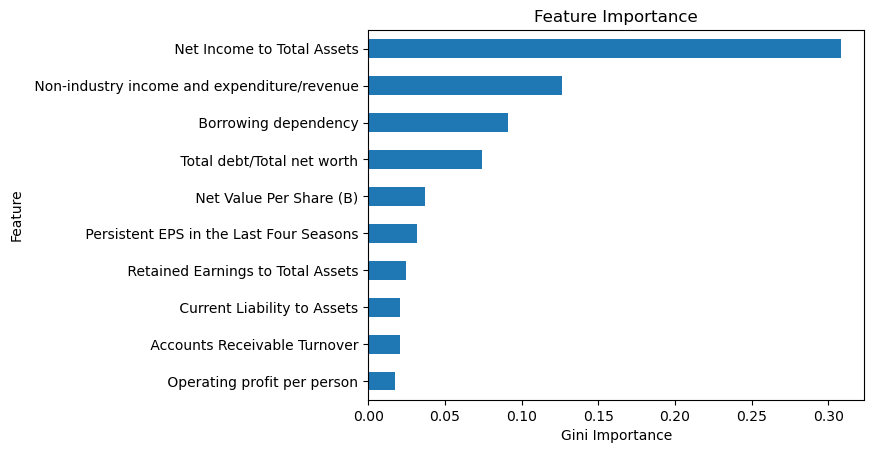

In [94]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps['gradientboostingclassifier'].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [95]:
# save the model
import pickle
with open( "Gradient_boosting_model.pkl",'wb') as f :
    pickle.dump(model,f)

In [96]:
def make_predictions(data_filepath, model_filepath):
    # Wrangle JSON file
    X_test = pd.read_csv(data_filepath)
    # Load model
    with open(model_filepath,'rb') as file:
        model=pickle.load(file)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series with name "bankrupt", and same index as X_test
    y_test_pred = pd.Series(y_test_pred,index=X_test.index,name='bankrupt')
    return y_test_pred

In [97]:
y_test_pred = make_predictions(
    data_filepath="data/X_test.csv",
    model_filepath="Gradient_boosting_model.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (1364,)


0    0
1    0
2    0
3    1
4    0
Name: bankrupt, dtype: int64